In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers torch datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
df = pd.read_csv('/content/UT-train.csv')
tdf = pd.read_csv('/content/UT-test.csv')
df

,text,source,category,class
0,মাগির পোলা তর ভাব দেখতে ভালো লাগে না। তোমার বি...,toxic_comments,Unsafe,Adult
1,বি এনপি একটি অনুভূতির নাম।।,bangla_comment_dataset,Safe,Safe
2,The Talking Bro,Facebook,Safe,Safe
3,আহরে রোজার দিনের রোগে দরে পাবনা হসপিটাল কি বন্...,bangla_comment_dataset,Safe,Safe
4,বড় বড় লোকের বড় বড় ব্যাপার- স্যাপার,bangla_comment_dataset,Safe,Safe
...,...,...,...,...
7755,বান্দির পুতে এমনে ফাল পারে কেন﻿,toxic_comments,Unsafe,Adult
7756,ইতিহাসের প্রথমবারের মতো কম্বলের নিচে গিটার বা...,Facebook,Safe,Safe
7757,"ওয়াল্টন আর মার্সেল কি দোষ করছে যে,শেষ পর্যন্ত ...",toxic_comments,Unsafe,Adult
7758,নাইস বোগল,bangla_comment_dataset,Safe,Safe


In [4]:
df['class'].value_counts()

,count
class,
Safe,4377
Adult,1434
Harmful,1100
Suicidal,849


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df1 = df[df['category']=="Unsafe"]
tdf1 = tdf[tdf['category']=="Unsafe"]

In [7]:
categories = ['Adult', 'Harmful', 'Suicidal']
df1['class'] = pd.Categorical(df1['class'], categories=categories, ordered=True)
df1['class'], uniques = pd.factorize(df1['class'], sort=True)
uniques

<ipython-input-7-56b84e99672f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class'] = pd.Categorical(df1['class'], categories=categories, ordered=True)
<ipython-input-7-56b84e99672f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class'], uniques = pd.factorize(df1['class'], sort=True)


CategoricalIndex(['Adult', 'Harmful', 'Suicidal'], categories=['Adult', 'Harmful', 'Suicidal'], ordered=True, dtype='category')

In [8]:
tdf1['class'] = pd.Categorical(tdf1['class'], categories=categories, ordered=True)
tdf1['class'], tuniques = pd.factorize(tdf1['class'], sort=True)
tuniques

<ipython-input-8-13d8f6598d39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf1['class'] = pd.Categorical(tdf1['class'], categories=categories, ordered=True)
<ipython-input-8-13d8f6598d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf1['class'], tuniques = pd.factorize(tdf1['class'], sort=True)


CategoricalIndex(['Adult', 'Harmful', 'Suicidal'], categories=['Adult', 'Harmful', 'Suicidal'], ordered=True, dtype='category')

In [9]:
df = df1
df

,text,source,category,class
0,মাগির পোলা তর ভাব দেখতে ভালো লাগে না। তোমার বি...,toxic_comments,Unsafe,0
5,কুত্তার বাচ্ছা,toxic_comments,Unsafe,1
6,হ্লার পুত তুই।,toxic_comments,Unsafe,1
12,যেীন জাগরনের এইডস সরকারের অবস্থা দেখুন রাস্তার...,bengali_hate,Unsafe,0
14,মোল্লাদের ঘরের মেয়েদের এরকম ধরে যতদিন ধর্ষন না...,bengali_hate,Unsafe,0
...,...,...,...,...
7752,ওর তো নায়িকা হতে সবার প্রথমে কি ভাবে সেক্সীফি...,bengali_hate,Unsafe,0
7753,"জীবন নিয়ে অনেক হতাশ। বিশ্ববিদ্যালয়, পড়াশুনা...",BanglaSAPM,Unsafe,2
7755,বান্দির পুতে এমনে ফাল পারে কেন﻿,toxic_comments,Unsafe,0
7757,"ওয়াল্টন আর মার্সেল কি দোষ করছে যে,শেষ পর্যন্ত ...",toxic_comments,Unsafe,0


In [10]:
df = df.sample(frac=1).reset_index(drop=True)
df

,text,source,category,class
0,বিচারক শালির বেটি মনে হয় ইচ্ছে এর বাংলা জানে না।,bengali_hate,Unsafe,1
1,৯ বছর রিলেশনশিপের পর ৪ বছর হল বিয়ে করেছি।আল্লা...,BanglaSAPM,Unsafe,2
2,শালা তোর বগলে মরিচ বাটা লাগাই দিমু,toxic_comments,Unsafe,1
3,মুর্খ অকৃতজ্ঞ রানু মন্ডল মর তুই,bengali_hate,Unsafe,1
4,নাইজুবিল্লাহ! এ আমি কি দেখলাম?,bengali_hate,Unsafe,0
...,...,...,...,...
3378,বেয়াদব খাঙ্কি,toxic_comments,Unsafe,0
3379,চুতমারানীর পোলা,toxic_comments,Unsafe,0
3380,সে ফেরার মতো কেউ ছিল না আপনার।🙌,BanglaSAPM,Unsafe,2
3381,আমরা অনেক সময় ই ভাবি যে 'ওই মানুষ টা আমার আপন ...,BanglaSAPM,Unsafe,2


In [11]:
df = df[df['text']!='[NULL]']
df.shape

(3383, 4)

In [12]:
X = df['text']
y = df['class']

train_texts, val_texts, train_labels, val_labels = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
test_texts = tdf1['text']
test_labels = tdf1['class']

In [14]:
from transformers import AutoTokenizer

# Load the tokenizer (you can use 'bert-base-multilingual-cased', 'xlm-roberta-base', or 'csebuetnlp/banglabert')
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [15]:
import torch
from datasets import Dataset

# Convert data into Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_data = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})
test_data = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels.tolist()})

In [16]:
def preprocess_function(examples):
    return tokenizer(
        examples['text'],
        padding=True,
        truncation=True,
        max_length=512,
)

In [17]:
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)
test_data = test_data.map(preprocess_function, batched=True)

Map:   0%|          | 0/2706 [00:00<?, ? examples/s]

Map:   0%|          | 0/677 [00:00<?, ? examples/s]

Map:   0%|          | 0/220 [00:00<?, ? examples/s]

In [18]:
train_data

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2706
})

In [19]:
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [20]:
from transformers import AutoModel

model = AutoModel.from_pretrained(model_name, num_labels=3)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [21]:
import torch
import torch.nn as nn

class BERT_LSTM_Multiclass(nn.Module):
    def __init__(self, lstm_hidden_size=256, lstm_layers=1, dropout=0.3, num_classes=3):
        super(BERT_LSTM_Multiclass, self).__init__()

        # ✅ Load mBERT inside the class
        self.bert = model  # Example, change to correct model

        # ✅ LSTM Layer (Bidirectional)
        self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, num_layers=lstm_layers,
                            batch_first=True, bidirectional=True, dropout=dropout)

        # ✅ Fully connected classification layer (for multiclass)
        self.fc = nn.Linear(lstm_hidden_size * 2, num_classes)  # ⬅ Output size for multiclass classification

        # ✅ Dropout layer for regularization
        self.dropout = nn.Dropout(dropout)

        # ✅ Use CrossEntropyLoss for multiclass classification
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, labels=None):
        # Get embeddings from mBERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state  # (batch_size, seq_len, 768)

        # Pass through BiLSTM
        lstm_out, _ = self.lstm(hidden_states)  # (batch_size, seq_len, hidden_size*2)
        lstm_out = lstm_out[:, -1, :]  # Take the last time step output

        # Pass through the classifier
        logits = self.fc(self.dropout(lstm_out))  # (batch_size, num_classes)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            loss = self.criterion(logits, labels)

        return (loss, logits) if loss is not None else logits

In [22]:
model = BERT_LSTM_Multiclass()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


In [23]:
from transformers import TrainingArguments, EarlyStoppingCallback

In [24]:
# pip install evaluate --quiet

In [25]:
# import evaluate
# import numpy as np

# # Load metrics using the evaluate library
# f1_metric = evaluate.load("f1")
# precision_metric = evaluate.load("precision")
# recall_metric = evaluate.load("recall")

In [26]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

def compute_metrics_multiclass(eval_pred):
    logits, labels = eval_pred

    # Convert logits to predicted class indices (argmax)
    predictions = torch.argmax(torch.tensor(logits), dim=-1).numpy()  # Shape: (batch_size,)

    # Compute metrics for multiclass classification (use average="macro" or "weighted")
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="macro", zero_division=1  # Change to "weighted" if needed
    )

    acc = accuracy_score(labels, predictions)

    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [27]:
# train_data.rename_column("label", "labels")
# val_data.rename_column("label", "labels")
# test_data.rename_column("label", "labels")

In [28]:
def make_model_contiguous(model):
    for param in model.parameters():
        param.data = param.data.contiguous()  # ✅ Ensure tensor is contiguous
        if param.grad is not None:
            param.grad.data = param.grad.data.contiguous()

make_model_contiguous(model)

In [30]:
training_args = TrainingArguments(
    output_dir="./xlmr_lstm",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    logging_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # Pretrained model
    args=training_args,                  # Updated training arguments
    train_dataset=train_data,            # Training data
    eval_dataset=val_data,               # Validation data
    tokenizer=tokenizer,                 # Tokenizer
    compute_metrics=compute_metrics_multiclass,      # Updated metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

<ipython-input-31-abe3a0f6cce3>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: arefinlabibndc19 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.769500,0.723135,0.703102,0.710506,0.710820,0.683552
2,0.622200,0.614203,0.759232,0.763322,0.773164,0.766654
3,0.582400,0.777981,0.769572,0.779555,0.777927,0.774819
4,0.537300,0.880791,0.765140,0.768085,0.778779,0.771840
5,0.523000,0.856137,0.775480,0.779620,0.787878,0.782856


TrainOutput(global_step=3385, training_loss=0.6068598557082026, metrics={'train_runtime': 2013.0867, 'train_samples_per_second': 6.721, 'train_steps_per_second': 1.681, 'total_flos': 0.0, 'train_loss': 0.6068598557082026, 'epoch': 5.0})

In [32]:
import numpy as np
from sklearn.metrics import classification_report
import torch

# Get predictions from the trainer
predictions = trainer.predict(test_data)

# ✅ Convert logits to probabilities using softmax for multiclass classification
probs = torch.softmax(torch.tensor(predictions.predictions), dim=-1)

# ✅ Convert probabilities to predicted labels (class with highest probability)
predicted_labels = torch.argmax(probs, dim=-1).numpy()

# ✅ Print classification report for multiclass classification
print(classification_report(test_labels, predicted_labels, digits=4))

              precision    recall  f1-score   support

           0     0.7048    0.7957    0.7475        93
           1     0.7593    0.5694    0.6508        72
           2     0.8689    0.9636    0.9138        55

    accuracy                         0.7636       220
   macro avg     0.7776    0.7763    0.7707       220
weighted avg     0.7636    0.7636    0.7574       220



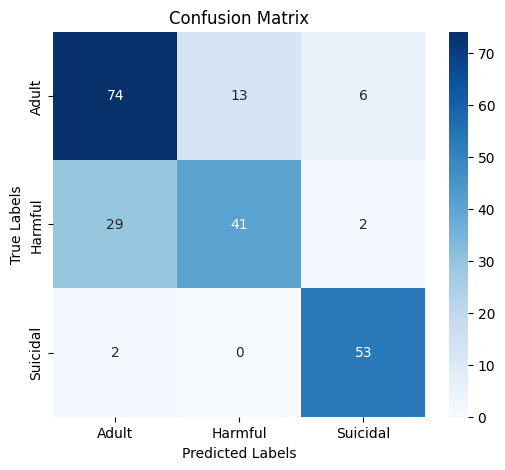

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=uniques, yticklabels=uniques)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [34]:
# Save the full model, not just the transformer
torch.save(model.state_dict(), "/content/drive/MyDrive/SafeReels-664/Models/Text_models/XLMR-LSTM-1.pth")